In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree
import scipy
import networkx as nx

In [2]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='760atoms_1500K.xyz',
    header=None,
    sep='\t',
    )
if df.shape[1]==4:
    df = df[~df[0].astype(str).str.startswith('2')]
df = df[df.columns[-3:]]
df.to_csv(r'test.csv', index = None)
df

,1,2,3
0,46.5221,23.2272,15.7731
1,52.7918,32.5747,30.6472
2,51.4788,19.6992,21.2963
4,66.2823,15.2787,29.3984
5,59.3501,23.6095,22.5923
...,...,...,...
754,59.6633,23.5870,18.5294
755,51.2364,36.8782,32.4872
756,43.7504,24.8203,31.2928
757,59.9207,20.6168,24.3486


In [3]:
x=np.array(df)
n=df.shape[0]
d=np.zeros(n)

for c in range(n):
    d[c]=np.sqrt(x[c,0]*x[c,0]+x[c,1]*x[c,1]+x[c,2]*x[c,2]) 

In [4]:
# d

In [5]:
main = np.hstack((d.reshape(n,1), x.reshape(n,3))).real
main_sorted_arg = np.argsort(main[:, 0])
main_sort = np.asarray(main[main_sorted_arg])
main_sort=np.asarray(main_sort)

In [6]:
#bond distance
bond_distance = 1.6

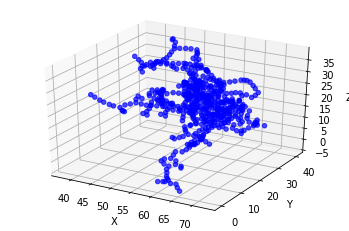

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
# x, y, z = np.loadtxt('test.csv', delimiter=',',unpack=True)
x=main[:,1]
y=main[:,2]
z=main[:,3]
ax1.scatter(x,y,z, alpha=0.7, cmap='rainbow', marker='o',c='b')

plt.show()

In [ ]:
def checkDuplicate(neddleCycle, cycles):
    neddleCycle = np.asarray(neddleCycle)
    cycles = np.asarray(cycles)
    
    for cycle in cycles:
        if len(cycle) != neddleCycle.shape[0]:
            continue
        if np.all(np.isin(neddleCycle, cycle)):
            return True
    return False


main_sort=np.asarray(main_sort)
graph = distance_matrix(main_sort[:, 1:], main_sort[:, 1:]) <= bond_distance
np.fill_diagonal(graph, False)


G = nx.DiGraph()
G = nx.from_numpy_matrix(graph, create_using=nx.DiGraph)
all_cycles = list(nx.simple_cycles(G))
cycles = []

for cycle in all_cycles:
    if len(cycle) > 2 and not checkDuplicate(cycle, cycles):
        cycles.append(cycle)
#cycles.append([21,22,23,44,55,66,77,88,99,100,1201])
# cycles



In [ ]:
 np.asarray(G)


In [ ]:
molecular_array = []
ring_array = []

def isSubSet(current, toCompare):
    
    return np.in1d(toCompare,current).all()

i = 0
for r in cycles:
    if(len(r)) < 8:
        ring_array.append(r)
        i += 1
        continue
    if i > 0:
        prev_item = cycles[i-1]
        
        if isSubSet(r, prev_item):
            #remove r from cycle or do some other thing
            #print("Subset paise agertay")
            #print(r)
            #print(prev_item)
            molecular_array.append(r)
            i+=1
            continue
        
        
    if i < len(cycles)-1:
        next_item = cycles[i+1]
        
        if isSubSet(r, next_item):
            #remove r from cycle or do some other thing
            #print("Subset paise porertay")
            #print(r)
            #print(next_item)
            molecular_array.append(r)
            i+=1
            continue
        
    
    ring_array.append(r)
    
    i += 1
    
# print("Boro array",boro_array)
# print("Choto array",choto_array)


a = {}
b = {}


for r in ring_array:
    if len(r) in a:
        a[len(r)] = a[len(r)] + 1
    else:
        a[len(r)] = 1

for l in molecular_array:
    if len(l) in b:
        b[len(l)] = b[len(l)] + 1
    else:
        b[len(l)] = 1


In [ ]:
if len(cycles)!=0:
    ARnumber=np.unique(np.hstack(ring_array)).shape[0]
    ALnumber=df.shape[0]-ARnumber
    PercentageAromatic=ARnumber/(ARnumber+ALnumber)
    PercentageAlephatic=ALnumber/(ARnumber+ALnumber)
    print("Existing Rings\t",a)
    print("Molecular Rings\t",b)
    print("Number of Aromatic Carbon Atom\t:",ARnumber)
    print("Number of Alephatic Carbon Atom\t:",ALnumber)
    print("Percentage of Aromatic components\t:",PercentageAromatic)
    print("Percentage of Alephatic components\t:",PercentageAlephatic)
else:
    print("No Ring Found")

In [ ]:
ring_array

In [ ]:
1.3